Examen 2 Sistemas Distribuídos

Ocoparé los archivos descargados de la primera versión del examen adquuiridos desde la liga
1. Adquirimos los datos descagándolos de https://archive.org/download/nycTaxiTripData2013/trip_data.7z
2. Descomprimir los archivos 
Me cambio a la carpeta donde trabajaré  cd Desktop/SD_Exam2
  

In [22]:
cd SD_Exam2

[Errno 2] No such file or directory: 'SD_Exam2'
/Users/MacBookPro15/Desktop/SD_Exam2


3. Responder las siguientes preguntas:

     1. Cuantas columnas contiene cada archivo de datos descomprimido
     2. Cuantos renglones tiene cada archivo
     Renglones   Columnas
     Archivo 1:
     (14776615, 14)
     Archivo 2:
     (13990176, 14)
     Archivo 3:
     (15749228, 14)
     Archivo 4:
     (15100468, 14)
     Archivo 5:
     (15285049, 14)
     Archivo 6:
     (14385456, 14)
     Archivo 7:
     (13823840, 14)
     Archivo 8:
     (12597109, 14)
     Archivo 9:
     (14107693, 14)
     Archivo 10:
     (15004556, 14)
     Archivo 11:
     (14388451, 14)
     Archivo 12:
     (13971118, 14)

In [23]:
#Para poder responder la pregunta 3 necesito utilizar la liberría Pandas por lo que la importo de una vez
#Para medir los tiempos también usaré la librería time
import pandas as pd, time

In [17]:
#Leo el archivo 1 para ver su estructura y responder la pregunta 1
df = pd.read_csv('trip_data_1.csv')

In [19]:
#Verifico si lo leyó bien, para ello visualizo los primeros datos con los nombres de las columnas
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [23]:
import dask.dataframe as dd

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [28]:
#Para responder a la pregunta, leeré con un cliclo for los 12 archivos

plantilla = "trip_data_{}.csv"
for i in range(1, 13):
    df_provisional = dd.read_csv(plantilla.format(i), dtype={' store_and_fwd_flag': 'object'})
    print(df_provisional.compute().shape)
    print("#############################################")

(14776615, 14)
#############################################


/anaconda3/lib/python3.7/site-packages/dask/core.py:118: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  args2 = [_execute_task(a, cache) for a in args]


(13990176, 14)
#############################################
(15749228, 14)
#############################################
(15100468, 14)
#############################################
(15285049, 14)
#############################################
(14385456, 14)
#############################################
(13823840, 14)
#############################################
(12597109, 14)
#############################################
(14107693, 14)
#############################################
(15004556, 14)
#############################################
(14388451, 14)
#############################################
(13971118, 14)
#############################################


4.- Identificar si existen renglones con errores en los datos, por ejemplo si hay columnas de mas (o de menos), si hay campos vacios, etc. Si se detectan renglones con errores:
    1. Indicar claramente cuantos son los renglones con errores y a que archivos corresponden
    2. Crear un nuevo conjunto de datos con los errores eliminados

Analizando la tabla impresa en la celda de Head, puedo inferir que los errores que puede tener cada archivo son:
Datos faltantes, coordenadas que estén fuera de la ciudad de New York, que un taxi tenga un mayor número de pasajeros de los que pueda llevar, entre los más importantes. Me centraré en buscar estos errores.

In [35]:
#Crearé una plantilla para crear nuevos archivos sin los errores
#Celda consultada por el compañero Enrique Virgen Dorantes
plantSalida = "new_trip_data_{}.csv"
#Leo todos los archivos
for i in range(1, 13):
    df_provisional = pd.read_csv(plantilla.format(i))
    datErroneos = df_provisional.isna() #Verifico si tiene datos NaN
    errores = datErroneos[datErroneos.isin([True])].dropna(how="all")   #Verifico si tiene datos faltantes
    print("El archivo {} tiene {} lineas con errores de datos faltantes".format(i, errores.shape[0]))
    df_provisional = df_provisional.drop(errores.index)
    antes = df_provisional.shape[0]
    df_provisional.columns = df_provisional.columns.str.strip()
    df_provisional = df_provisional[(df_provisional["pickup_longitude"] > -74.253842) & (df_provisional["pickup_longitude"] <  -73.709271) & (df_provisional["pickup_latitude"] > 40.495089) & (df_provisional["pickup_latitude"] < 40.910281)]
    print("El archivo {} tiene {} errores de coordenadas fuera de rango".format(i, (antes - df_provisional.shape[0])))
    antes = df_provisional.shape[0]
    df_provisional = df_provisional[(df_provisional["passenger_count"] > 0) & (df_provisional["passenger_count"] < 7)]
    print("El archivo {} tiene {} errores de pasajeros".format(i, (antes - df_provisional.shape[0])))
    df_provisional.to_csv(plantSalida.format(i), sep=',', encoding='utf-8')
    print("El archivo ",plantSalida.format(i), "fué creado con éxito")
    print("####################################################################")
    #Elimino el archivo que contiene los errores
    os.system('rm '+plantilla.format(i)) 

El archivo 1 tiene 7326207 lineas con errores de datos faltantes
El archivo 1 tiene 140165 errores de coordenadas fuera de rango
El archivo 1 tiene 33 errores de pasajeros


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


El archivo 2 tiene 6952551 lineas con errores de datos faltantes
El archivo 2 tiene 137878 errores de coordenadas fuera de rango
El archivo 2 tiene 55 errores de pasajeros
El archivo 3 tiene 7819244 lineas con errores de datos faltantes
El archivo 3 tiene 157562 errores de coordenadas fuera de rango
El archivo 3 tiene 64 errores de pasajeros
El archivo 4 tiene 7518657 lineas con errores de datos faltantes
El archivo 4 tiene 150954 errores de coordenadas fuera de rango
El archivo 4 tiene 44 errores de pasajeros
El archivo 5 tiene 7621856 lineas con errores de datos faltantes
El archivo 5 tiene 159819 errores de coordenadas fuera de rango
El archivo 5 tiene 33 errores de pasajeros
El archivo 6 tiene 7222712 lineas con errores de datos faltantes
El archivo 6 tiene 146824 errores de coordenadas fuera de rango
El archivo 6 tiene 40 errores de pasajeros
El archivo 7 tiene 6990760 lineas con errores de datos faltantes
El archivo 7 tiene 133125 errores de coordenadas fuera de rango
El archivo 

In [36]:
import os

In [38]:
#verifico que se hayan creado los archivos nuevos
!ls

new_trip_data_1.csv  new_trip_data_6.csv  trip_data_2.csv
new_trip_data_10.csv new_trip_data_7.csv  trip_data_3.csv
new_trip_data_11.csv new_trip_data_8.csv  trip_data_4.csv
new_trip_data_12.csv new_trip_data_9.csv  trip_data_5.csv
new_trip_data_2.csv  trip_data_1.csv      trip_data_6.csv
new_trip_data_3.csv  trip_data_10.csv     trip_data_7.csv
new_trip_data_4.csv  trip_data_11.csv     trip_data_8.csv
new_trip_data_5.csv  trip_data_12.csv     trip_data_9.csv


In [13]:
#Borro los archivos con errores para que no ocupen más espacio
plantilla = "trip_data_{}.csv"
for i in range(1, 13):
    os.system('rm '+plantilla.format(i))

NameError: name 'os' is not defined

In [40]:
!ls

new_trip_data_1.csv  new_trip_data_2.csv  new_trip_data_6.csv
new_trip_data_10.csv new_trip_data_3.csv  new_trip_data_7.csv
new_trip_data_11.csv new_trip_data_4.csv  new_trip_data_8.csv
new_trip_data_12.csv new_trip_data_5.csv  new_trip_data_9.csv


5. Crear un DataFrame usando la libreria pandas
Responder lo siguiente:

    1. Indicar el tiempo en segundos, que tarda la libreria pandas en leer un archivo a un DataFrame.
    2. Cual es la huella de memoria del proceso usado para generar el objeto DataFrame
    3. Cuanta memoria del sistema se usa para crear el objeto anterior
    4. Indicar el tiempo que tarda pandas en obtener el promedio de la distancia de viaje (trip_distance)
    
    Respuestas:
    1. Tiempo de lectura del archivo 1 fue de: 123.2542188167572 s
    2. Memoria antes: 15.48046875 MB
       Memoria despues: 768.80078125 MB
       La cantidad de memoria que ocupa el dataframe es de: 753.3203125 MB
    3. Memoria usada por el objeto dataframe: 1578 MB
    4. Tiempo que tarda pandas en calcular promedio 2.770975670679966

In [42]:
t_start = time.time()
df = pd.read_csv('new_trip_data_1.csv')
t_end = time.time()
print('Tiempo de lectura del archivo 1 fue de: {} s'.format(t_end-t_start)) # time [s]

Tiempo de lectura del archivo 1 fue de: 123.2542188167572 s


In [45]:
import psutil

In [50]:
def huella_memoria():
  '''Regresa la huella de memoria usada por un proceso de Python'''
  mem = psutil.Process(os.getpid()).memory_info().rss
  return (mem / 1024**2)

In [51]:
antes = huella_memoria()
df = pd.read_csv('trip_data_1.csv')
despues = huella_memoria()
mem_objeto = despues-antes
print('Memoria antes: {} MB'.format(antes))
print('Memoria despues: {} MB'.format(despues))
print('La cantidad de memoria que ocupa el dataframe es de: {} MB'.format(mem_objeto))

Memoria antes: 15.48046875 MB
Memoria despues: 768.80078125 MB
La cantidad de memoria que ocupa el dataframe es de: 753.3203125 MB


In [52]:
#  Cuanta memoria del sistema se usa para crear el objeto
tamano=df.memory_usage().sum() // (1024**2)  
print('Memoria usada por el objeto dataframe: {} MB'.format(tamano))

Memoria usada por el objeto dataframe: 1578 MB


In [53]:
#Mido el promedio que tarda pandas en calcular el promedio de la distancia del viaje
%time promedio=df['trip_distance'].mean()
print("Tiempo que tarda pandas en calcular promedio", promedio)

CPU times: user 76.7 ms, sys: 1.21 s, total: 1.28 s
Wall time: 5.52 s
Tiempo que tarda pandas en calcular promedio 2.770975670679966


6. Todos los pasos siguientes deben realizarse usando la libreria dask
   A. Indicar el tiempo que tarda en obtener el promedio de la distancia de viaje (trip_distance)
   B. Indicar el tiempo que tarda en obtener el promedio de la duracion de viaje (trip_time_in_secs)
   C. Con las columnas pickup_datetime y dropoff_datetime como objetos temporales, crear una nueva columna en los    
      dataframes que se llame duracion y compararla renglon a renglon con la columna trip_time_in_secs
   D. Definir un viaje_largo como aquellos en los que la duracion del viaje (trip_time_in_secs) sea mayor a 20 
      minutos.
      
      Respuestas.
      A. El tiempo que tarda en obtener el promedio de la distancia de viaje: 588.8949592113495 seg
      B. El tiempo que tarda en obtener el promedio de la duración de viaje: 593.4257910251617 seg
      C. Hay 32200528 datos diferentes
      D. Existen 13222663 viajes largos
      

In [9]:
import dask.dataframe as dd

/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [66]:
#Leo los archivos
archivos = dd.read_csv("*.csv")

In [67]:
prom = archivos["trip_distance"].mean()
inicio = time.time()
promedio = prom.compute()
fin = time.time()
print("El tiempo que tarda en obtener el promedio de la distancia de viaje: {} seg".format(fin - inicio))

El tiempo que tarda en obtener el promedio de la distancia de viaje: 588.8949592113495 seg


In [68]:
prom = archivos["trip_time_in_secs"].mean()
inicio = time.time()
promedio = prom.compute()
fin = time.time()
print("El tiempo que tarda en obtener el promedio de la duración de viaje: {} seg".format(fin - inicio))

El tiempo que tarda en obtener el promedio de la distancia de viaje: 593.4257910251617 seg


In [69]:
# Convert 'pickup_datetime' column to datetime objects
archivos["pickup_datetime"] = da.to_datetime( archivos["pickup_datetime"] )
# Convert 'dropoff_datetime' column to datetime objects
archivos["dropoff_datetime"] = da.to_datetime( archivos["dropoff_datetime"] )
# Make column 'duracion'
archivos["duracion"] = archivos["dropoff_datetime"] - archivos["pickup_datetime"]
# Construct column 'duracion'
archivos["duracion"] = archivos["duracion"].dt.total_seconds()
out = archivos[(archivos["duracion"] != archivos["trip_time_in_secs"] )]
print("Hay {} datos diferentes".format(archivos.compute().shape[0] - out.compute().shape[0]))

Hay 32200528 datos diferentes


In [79]:
#PAra responder la última pregunta del punto 6
archivos = dd.read_csv("*.csv", usecols=["pickup_datetime", "dropoff_datetime"])

In [81]:
# Convert 'pickup_datetime' column to datetime objects
archivos["pickup_datetime"] = da.to_datetime(archivos["pickup_datetime"])
# Convert 'dropoff_datetime' column to datetime objects
archivos["dropoff_datetime"] = da.to_datetime(archivos["dropoff_datetime"])
archivos["duracion"] = archivos["dropoff_datetime"] - archivos["pickup_datetime"]
archivos["duracion"] = archivos["duracion"].dt.total_seconds()
es_viaje_largo = archivos[(archivos["duracion"] > 1200)] # viajes que duran mas de 20 minutos
print("Existen {} viajes largos".format(es_viaje_largo.compute().shape[0]))

Existen 13222663 viajes largos


7.- Contar el numero de viajes largos en cada archivo

In [85]:
for i in range(1,13):
    archivos = dd.read_csv(plantilla.format(i), usecols=["pickup_datetime", "dropoff_datetime"])
    # Convert 'pickup_datetime' column to datetime objects
    archivos["pickup_datetime"] = da.to_datetime(archivos["pickup_datetime"])
    # Convert 'dropoff_datetime' column to datetime objects
    archivos["dropoff_datetime"] = da.to_datetime(archivos["dropoff_datetime"])
    archivos["duracion"] = archivos["dropoff_datetime"] - archivos["pickup_datetime"]
    archivos["duracion"] = archivos["duracion"].dt.total_seconds()
    es_viaje_largo = archivos[(archivos["duracion"] > 1200)] # viajes que duran mas de 20 minutos
    print("El archivo {} tiene {} viajes largos".format(plantilla.format(i), es_viaje_largo.compute().shape[0]))

El archivo trip_data_1.csv tiene 860775 viajes largos
El archivo trip_data_2.csv tiene 883053 viajes largos
El archivo trip_data_3.csv tiene 1051929 viajes largos
El archivo trip_data_4.csv tiene 1116051 viajes largos
El archivo trip_data_5.csv tiene 1270020 viajes largos
El archivo trip_data_6.csv tiene 1185026 viajes largos
El archivo trip_data_7.csv tiene 1024485 viajes largos
El archivo trip_data_8.csv tiene 1002018 viajes largos
El archivo trip_data_9.csv tiene 1193126 viajes largos
El archivo trip_data_10.csv tiene 1265712 viajes largos
El archivo trip_data_11.csv tiene 1175222 viajes largos
El archivo trip_data_12.csv tiene 1195246 viajes largos


8. De los viajes largos
   1. Identificar el numero de taxis diferentes (la columna medallion contiene un numeroque identificada a cada uno  
      de los vehiculos).
      El archivo trip_data_1.csv tiene 6526 taxis diferentes que hacen viajes largos
El archivo trip_data_2.csv tiene 6504 taxis diferentes que hacen viajes largos
El archivo trip_data_3.csv tiene 6519 taxis diferentes que hacen viajes largos
El archivo trip_data_4.csv tiene 6500 taxis diferentes que hacen viajes largos
El archivo trip_data_5.csv tiene 6530 taxis diferentes que hacen viajes largos
El archivo trip_data_6.csv tiene 6543 taxis diferentes que hacen viajes largos
El archivo trip_data_7.csv tiene 6419 taxis diferentes que hacen viajes largos
El archivo trip_data_8.csv tiene 6411 taxis diferentes que hacen viajes largos
El archivo trip_data_9.csv tiene 6417 taxis diferentes que hacen viajes largos
El archivo trip_data_10.csv tiene 6404 taxis diferentes que hacen viajes largos
El archivo trip_data_11.csv tiene 6397 taxis diferentes que hacen viajes largos
El archivo trip_data_12.csv tiene 6420 taxis diferentes que hacen viajes largos
   2. Que vehiculos son los que mas viajes realizan en cada mes?
   3. Son el mismo vehiculo?

In [94]:
for i in range(1,13):
    archivos = dd.read_csv(plantilla.format(i), usecols=["pickup_datetime", "dropoff_datetime", "medallion"])
    # Convert 'pickup_datetime' column to datetime objects
    archivos["pickup_datetime"] = da.to_datetime(archivos["pickup_datetime"])
    # Convert 'dropoff_datetime' column to datetime objects
    archivos["dropoff_datetime"] = da.to_datetime(archivos["dropoff_datetime"])
    archivos["duracion"] = archivos["dropoff_datetime"] - archivos["pickup_datetime"]
    archivos["duracion"] = archivos["duracion"].dt.total_seconds()
    es_viaje_largo = archivos[(archivos["duracion"] > 1200)] # viajes que duran mas de 20 minutos
    diferentes = es_viaje_largo.groupby('medallion').count()
    numDiferentes = len(diferentes)
    print("El archivo {} tiene {} taxis diferentes que hacen viajes largos".format(plantilla.format(i), numDiferentes))
    

El archivo trip_data_1.csv tiene 6526 taxis diferentes que hacen viajes largos
El archivo trip_data_2.csv tiene 6504 taxis diferentes que hacen viajes largos
El archivo trip_data_3.csv tiene 6519 taxis diferentes que hacen viajes largos
El archivo trip_data_4.csv tiene 6500 taxis diferentes que hacen viajes largos
El archivo trip_data_5.csv tiene 6530 taxis diferentes que hacen viajes largos
El archivo trip_data_6.csv tiene 6543 taxis diferentes que hacen viajes largos
El archivo trip_data_7.csv tiene 6419 taxis diferentes que hacen viajes largos
El archivo trip_data_8.csv tiene 6411 taxis diferentes que hacen viajes largos
El archivo trip_data_9.csv tiene 6417 taxis diferentes que hacen viajes largos
El archivo trip_data_10.csv tiene 6404 taxis diferentes que hacen viajes largos
El archivo trip_data_11.csv tiene 6397 taxis diferentes que hacen viajes largos
El archivo trip_data_12.csv tiene 6420 taxis diferentes que hacen viajes largos


In [96]:
for i in range(1,13):
    archivos = dd.read_csv(plantilla.format(i), usecols=["pickup_datetime", "dropoff_datetime", "medallion"])
    # Convert 'pickup_datetime' column to datetime objects
    archivos["pickup_datetime"] = da.to_datetime(archivos["pickup_datetime"])
    # Convert 'dropoff_datetime' column to datetime objects
    archivos["dropoff_datetime"] = da.to_datetime(archivos["dropoff_datetime"])
    archivos["duracion"] = archivos["dropoff_datetime"] - archivos["pickup_datetime"]
    archivos["duracion"] = archivos["duracion"].dt.total_seconds()
    es_viaje_largo = archivos[(archivos["duracion"] > 1200)] # viajes que duran mas de 20 minutos
    

In [98]:
es_viaje_largo["medallion"]

Dask Series Structure:
npartitions=20
    object
       ...
     ...  
       ...
       ...
Name: medallion, dtype: object
Dask Name: getitem, 400 tasks

   9.Hacer una grafica temporal del numero total de pasajeros agregados por dias de la semana y despues por horas del 
     dia.
     Sugerencia: agregar por el correspondiente periodo temporal y graficar. Que pueden observar de las graficas?


In [99]:
#Primero importo la librería matplot para hacer las gráficas
import matplotlib.pyplot as plot

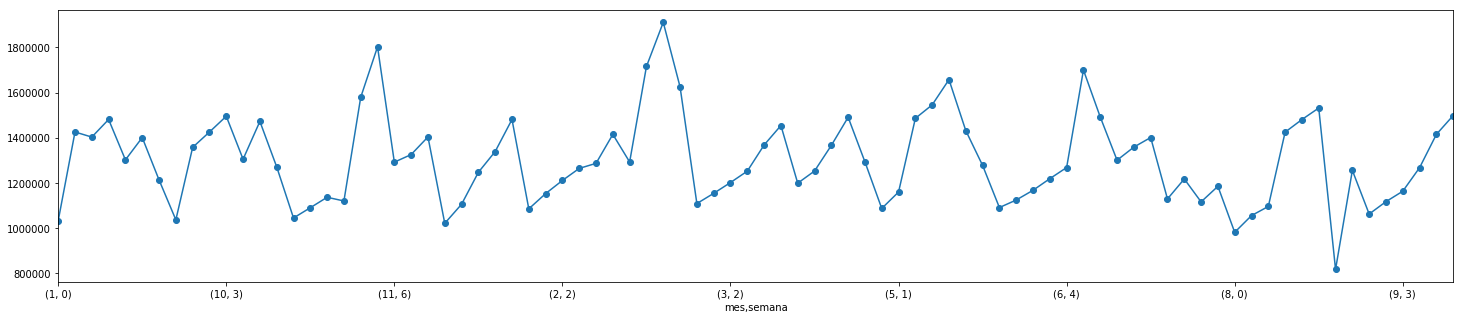

In [112]:
archivos = dd.read_csv("trip_data_*.csv", usecols=["pickup_datetime", "passenger_count"])
archivos["pickup_datetime"] = dd.to_datetime(archivos['pickup_datetime']) #Convertir columna pacssenger_count a tiempo y hora
archivos["mes"] = archivos["pickup_datetime"].dt.month   #Lo convierto a meses
archivos["semana"] = archivos["pickup_datetime"].dt.weekday # a semanas
numPasajeros = archivos.groupby(["mes","semana"])["passenger_count"].sum().compute()
numPasajeros.plot.line(style="-o", figsize=(25,5))

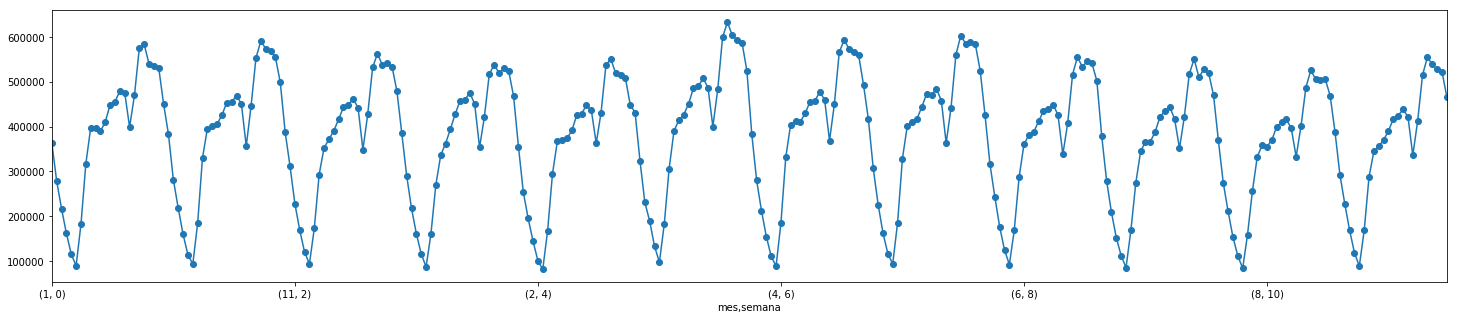

In [113]:
archivos = dd.read_csv("trip_data_*.csv", usecols=["pickup_datetime", "passenger_count"])
archivos["pickup_datetime"] = dd.to_datetime(archivos['pickup_datetime']) #Convertir columna pacssenger_count a tiempo y hora
archivos["mes"] = archivos["pickup_datetime"].dt.month   #Lo convierto a meses
archivos["semana"] = archivos["pickup_datetime"].dt.hour # a semanas
numPasajeros = archivos.groupby(["mes","semana"])["passenger_count"].sum().compute()
numPasajeros.plot.line(style="-o", figsize=(25,5))

10. Elegir el vehiculo con mas viajes en cada mes y graficar en un mapa los sitios donde se suben pasajeros agrupados por:
      - díaa de la semana (un color distinto para cada dia)
      - hora del día (un color distinto para cada intervalo de cuatro horas,00:00 - 03:59, 04:00--07:59, 08:00-11:59, 
        etc.)

In [5]:
from bokeh.models import BoxZoomTool
from bokeh.plotting import figure, output_notebook, show
from bokeh.tile_providers import STAMEN_TERRAIN

In [6]:
NYC = x_range, y_range = ((-8242000,-8210000), (4965000,4990000))
output_notebook()

Loading BokehJS ...

In [7]:
plot_width  = int(750)
plot_height = int(plot_width//1.2)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)

    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None

    p.add_tools(BoxZoomTool(match_aspect=True))

    return p

In [19]:
#Primero busquemos los vehículos con más viajes en cada mes
plantilla = "trip_data_{}.csv"
vehiculos = []
for i in range(1,13):
  archivos = dd.read_csv(plantilla.format(i), usecols=["medallion"])
  masViajes = archivos["medallion"].value_counts()
  t = masViajes.compute()[:1]
  vehiculos.append(t)

In [133]:
vehiculos

[7E1346F23960CC18D7D129FA28B63A75    2136
 Name: medallion, dtype: int64, 6FE6DFF9A59C0B64BE0CA64EE2699F08    1939
 Name: medallion, dtype: int64, 9F1FEF916240E64AD4EC5B7883E6A435    2042
 Name: medallion, dtype: int64, 20BA941F62CC07F1FA3EF3E122B1E9B2    2032
 Name: medallion, dtype: int64, 20BA941F62CC07F1FA3EF3E122B1E9B2    2186
 Name: medallion, dtype: int64, 20BA941F62CC07F1FA3EF3E122B1E9B2    1969
 Name: medallion, dtype: int64, DACFA6EF35923081481A22BE96339B6E    1950
 Name: medallion, dtype: int64, 6403BF98E4618E21C795C3B45A636D77    1774
 Name: medallion, dtype: int64, 20BA941F62CC07F1FA3EF3E122B1E9B2    1932
 Name: medallion, dtype: int64, 20BA941F62CC07F1FA3EF3E122B1E9B2    2102
 Name: medallion, dtype: int64, DACFA6EF35923081481A22BE96339B6E    1921
 Name: medallion, dtype: int64, F3E844649503D2A5A44DD729348E7336    1890
 Name: medallion, dtype: int64]

In [20]:
from pyproj import Proj, transform

In [21]:
#Estas funciones las consultè con el compañero Rafael Flores.
##funciones encontradas en interned y adaptadas para este ejercicio
def convertCoordsPick(row):
    x2,y2 = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'),row['pickup_longitude'],row['pickup_latitude'])
    return pd.Series([x2,y2])

def convertCoordsDrop(row):
    x2,y2 = transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'),row['dropoff_longitude'],row['dropoff_latitude'])
    return pd.Series([x2,y2])

In [28]:
#Creo una lista con los taxis que hiiceron mas viajes por mes
medallones = ["","7E1346F23960CC18D7D129FA28B63A75","6FE6DFF9A59C0B64BE0CA64EE2699F08","9F1FEF916240E64AD4EC5B7883E6A435"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"DACFA6EF35923081481A22BE96339B6E","6403BF98E4618E21C795C3B45A636D77","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","DACFA6EF35923081481A22BE96339B6E","F3E844649503D2A5A44DD729348E7336"]

colorXdia = ["green","yellow","violet","black","red","blue","gray"]
dias = ["domingo","lunes","martes","miércoles","jueves","viernes","sábado"]

p = base_plot()
p.add_tile(STAMEN_TERRAIN)

for i in range(1,13):
    archivos = dd.read_csv(plantilla.format(i), usecols=["medallion","pickup_datetime","pickup_datetime"
                                                         ,"pickup_longitude","pickup_latitude"])
    taxi = medallones[i]
    buscaTaxiMedallon = archivos[archivos["medallion"] == taxi]   #obtengo solo el taxi con los medallones mejores de cada mes
    buscaTaxiMedallon["mejor"] = dd.to_datetime(buscaTaxiMedallon["pickup_datetime"])  #creo una columna y la convierto a fecha y tiempo
    buscaTaxiMedallon["weekday"] = buscaTaxiMedallon["mejor"].dt.weekday   #Creo una columna convertida a semana 0 a 7
    buscaTaxiMedallon = buscaTaxiMedallon.compute()
    buscaTaxiMedallon[['xp','yp']] = buscaTaxiMedallon.apply(convertCoordsPick,axis=1)
    muestras0 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 0]
    muestras1 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 1]
    muestras2 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 2]
    muestras3 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 3]
    muestras4 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 4]
    muestras5 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 5]
    muestras6 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 6]
    p.circle(x=muestras0['xp'], y = muestras0['yp'],legend='Lunes', color=colorXdia[0])
    p.circle(x=muestras1['xp'], y = muestras1['yp'],legend='Martes', color=colorXdia[1])
    p.circle(x=muestras2['xp'], y = muestras2['yp'],legend='Miercoles', color=colorXdia[2])
    p.circle(x=muestras3['xp'], y = muestras3['yp'],legend='Jueves', color=colorXdia[3])
    p.circle(x=muestras4['xp'], y = muestras4['yp'],legend='Viernes', color=colorXdia[4])
    p.circle(x=muestras5['xp'], y = muestras5['yp'],legend='Sabado', color=colorXdia[5])
    p.circle(x=muestras6['xp'], y = muestras6['yp'],legend='Domingo', color=colorXdia[6])
show(p)
        

In [29]:
#Creo una lista con los taxis que hiiceron mas viajes por mes
medallones = ["","7E1346F23960CC18D7D129FA28B63A75","6FE6DFF9A59C0B64BE0CA64EE2699F08","9F1FEF916240E64AD4EC5B7883E6A435"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"DACFA6EF35923081481A22BE96339B6E","6403BF98E4618E21C795C3B45A636D77","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","DACFA6EF35923081481A22BE96339B6E","F3E844649503D2A5A44DD729348E7336"]

colorXdia = ["green","yellow","violet","black","red","blue","gray"]
dias = ["domingo","lunes","martes","miércoles","jueves","viernes","sábado"]

p = base_plot()
p.add_tile(STAMEN_TERRAIN)

for i in range(1,13):
    archivos = dd.read_csv(plantilla.format(i), usecols=["medallion","pickup_datetime","pickup_datetime"
                                                         ,"pickup_longitude","pickup_latitude"])
    taxi = medallones[i]
    buscaTaxiMedallon = archivos[archivos["medallion"] == taxi]   #obtengo solo el taxi con los medallones mejores de cada mes
    buscaTaxiMedallon["mejor"] = dd.to_datetime(buscaTaxiMedallon["pickup_datetime"])  #creo una columna y la convierto a fecha y tiempo
    buscaTaxiMedallon["hora"] = buscaTaxiMedallon["mejor"].dt.hour   #Creo una columna convertida a semana 0 a 7
    buscaTaxiMedallon = buscaTaxiMedallon.compute()
    buscaTaxiMedallon[['x','y']] = buscaTaxiMedallon.apply(convertCoordsPick,axis=1)
    muestras0 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 0]
    muestras1 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 1]
    muestras2 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 2]
    muestras3 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 3]
    muestras4 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 4]
    muestras5 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 5]
    muestras6 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 6]
    p.circle(x=muestras0['x'], y = muestras0['y'],legend='Lunes', color=colorXdia[0])
    p.circle(x=muestras1['x'], y = muestras1['y'],legend='Martes', color=colorXdia[1])
    p.circle(x=muestras2['x'], y = muestras2['y'],legend='Miercoles', color=colorXdia[2])
    p.circle(x=muestras3['x'], y = muestras3['y'],legend='Jueves', color=colorXdia[3])
    p.circle(x=muestras4['x'], y = muestras4['y'],legend='Viernes', color=colorXdia[4])
    p.circle(x=muestras5['x'], y = muestras5['y'],legend='Sabado', color=colorXdia[5])
    p.circle(x=muestras6['x'], y = muestras6['y'],legend='Domingo', color=colorXdia[6])
show(p)

11. Realizar los mismos mapas, pero ahora con los de bajada

In [31]:
#Creo una lista con los taxis que hiiceron mas viajes por mes
medallones = ["","7E1346F23960CC18D7D129FA28B63A75","6FE6DFF9A59C0B64BE0CA64EE2699F08","9F1FEF916240E64AD4EC5B7883E6A435"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"DACFA6EF35923081481A22BE96339B6E","6403BF98E4618E21C795C3B45A636D77","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","DACFA6EF35923081481A22BE96339B6E","F3E844649503D2A5A44DD729348E7336"]

colorXdia = ["green","yellow","violet","black","red","blue","gray"]
dias = ["domingo","lunes","martes","miércoles","jueves","viernes","sábado"]

p = base_plot()
p.add_tile(STAMEN_TERRAIN)

for i in range(1,13):
    archivos = dd.read_csv(plantilla.format(i), usecols=["medallion","dropoff_datetime",
                                                         "dropoff_longitude","dropoff_latitude"])
    taxi = medallones[i]
    buscaTaxiMedallon = archivos[archivos["medallion"] == taxi]   #obtengo solo el taxi con los medallones mejores de cada mes
    buscaTaxiMedallon["mejor"] = dd.to_datetime(buscaTaxiMedallon["dropoff_datetime"])  #creo una columna y la convierto a fecha y tiempo
    buscaTaxiMedallon["weekday"] = buscaTaxiMedallon["mejor"].dt.weekday   #Creo una columna convertida a semana 0 a 7
    buscaTaxiMedallon = buscaTaxiMedallon.compute()
    buscaTaxiMedallon[['xp','yp']] = buscaTaxiMedallon.apply(convertCoordsDrop,axis=1)
    muestras0 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 0]
    muestras1 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 1]
    muestras2 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 2]
    muestras3 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 3]
    muestras4 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 4]
    muestras5 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 5]
    muestras6 = buscaTaxiMedallon[buscaTaxiMedallon.weekday == 6]
    p.circle(x=muestras0['xp'], y = muestras0['yp'],legend='Lunes', color=colorXdia[0])
    p.circle(x=muestras1['xp'], y = muestras1['yp'],legend='Martes', color=colorXdia[1])
    p.circle(x=muestras2['xp'], y = muestras2['yp'],legend='Miercoles', color=colorXdia[2])
    p.circle(x=muestras3['xp'], y = muestras3['yp'],legend='Jueves', color=colorXdia[3])
    p.circle(x=muestras4['xp'], y = muestras4['yp'],legend='Viernes', color=colorXdia[4])
    p.circle(x=muestras5['xp'], y = muestras5['yp'],legend='Sabado', color=colorXdia[5])
    p.circle(x=muestras6['xp'], y = muestras6['yp'],legend='Domingo', color=colorXdia[6])
show(p)

In [32]:
medallones = ["","7E1346F23960CC18D7D129FA28B63A75","6FE6DFF9A59C0B64BE0CA64EE2699F08","9F1FEF916240E64AD4EC5B7883E6A435"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"DACFA6EF35923081481A22BE96339B6E","6403BF98E4618E21C795C3B45A636D77","20BA941F62CC07F1FA3EF3E122B1E9B2"
              ,"20BA941F62CC07F1FA3EF3E122B1E9B2","DACFA6EF35923081481A22BE96339B6E","F3E844649503D2A5A44DD729348E7336"]

colorXdia = ["green","yellow","violet","black","red","blue","gray"]
dias = ["domingo","lunes","martes","miércoles","jueves","viernes","sábado"]

p = base_plot()
p.add_tile(STAMEN_TERRAIN)

for i in range(1,13):
    archivos = dd.read_csv(plantilla.format(i), usecols=["medallion","dropoff_datetime",
                                                         "dropoff_longitude","dropoff_latitude"])
    taxi = medallones[i]
    buscaTaxiMedallon = archivos[archivos["medallion"] == taxi]   #obtengo solo el taxi con los medallones mejores de cada mes
    buscaTaxiMedallon["mejor"] = dd.to_datetime(buscaTaxiMedallon["dropoff_datetime"])  #creo una columna y la convierto a fecha y tiempo
    buscaTaxiMedallon["hora"] = buscaTaxiMedallon["mejor"].dt.hour   #Creo una columna convertida a semana 0 a 7
    buscaTaxiMedallon = buscaTaxiMedallon.compute()
    buscaTaxiMedallon[['x','y']] = buscaTaxiMedallon.apply(convertCoordsDrop,axis=1)
    muestras0 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 0]
    muestras1 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 1]
    muestras2 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 2]
    muestras3 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 3]
    muestras4 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 4]
    muestras5 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 5]
    muestras6 = buscaTaxiMedallon[buscaTaxiMedallon.hora == 6]
    p.circle(x=muestras0['x'], y = muestras0['y'],legend='Lunes', color=colorXdia[0])
    p.circle(x=muestras1['x'], y = muestras1['y'],legend='Martes', color=colorXdia[1])
    p.circle(x=muestras2['x'], y = muestras2['y'],legend='Miercoles', color=colorXdia[2])
    p.circle(x=muestras3['x'], y = muestras3['y'],legend='Jueves', color=colorXdia[3])
    p.circle(x=muestras4['x'], y = muestras4['y'],legend='Viernes', color=colorXdia[4])
    p.circle(x=muestras5['x'], y = muestras5['y'],legend='Sabado', color=colorXdia[5])
    p.circle(x=muestras6['x'], y = muestras6['y'],legend='Domingo', color=colorXdia[6])
show(p)